In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Read the dataset
df = pd.read_csv('../bitcoinDataAnalysis/datasets/coinmarketcap_06122017.csv', index_col=0)

In [8]:
df.head()

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10


In [9]:
# Select the 'id' and the 'market_cap_usd' columns

market_cap_raw = df[['id','market_cap_usd']]

In [10]:
market_cap_raw

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10
4,ripple,9.365343e+09
...,...,...
1321,turbocoin,NaN
1322,birds,NaN
1323,bitcoincashscrypt,NaN
1324,swisscoin,NaN


In [11]:
# count number of values
market_cap_raw.count()

id                1326
market_cap_usd    1031
dtype: int64

In [12]:
# Check the missing values
market_cap_raw.isna().sum()

id                  0
market_cap_usd    295
dtype: int64

In [13]:
# remove the missing values 
cap = market_cap_raw.dropna(subset=['market_cap_usd'])

In [14]:
cap.isna().sum()
#now there is no missing value 

id                0
market_cap_usd    0
dtype: int64

In [15]:
# plot the market capitalization for the top 10 coins as a barplot to better visualize.
cap10 = cap[:10].set_index('id')
# Calculating market_cap_perc


In [16]:
cap10 = cap10.assign(market_cap_perc = lambda x: (x.market_cap_usd / cap.market_cap_usd.sum())*100)




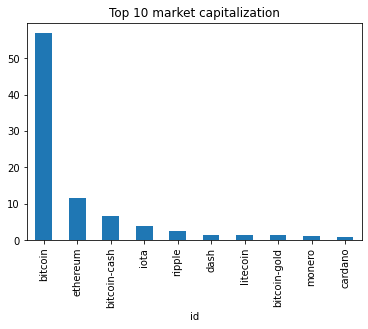

In [17]:
cap10.market_cap_perc.plot.bar()
plt.title("Top 10 market capitalization")
plt.show()

Text(0, 0.5, 'USD')

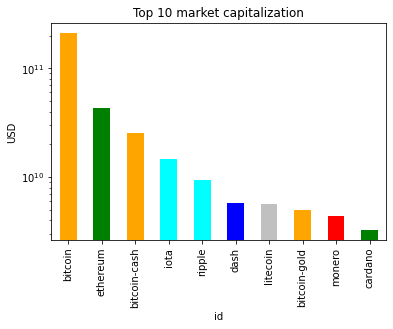

In [18]:
# From this graph we can see Bitcoin is to large and the other coins are hard to distinguish. 
# To make it more readable. Let's use log with USD rather than percentage 
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']

cap10.market_cap_usd.plot.bar(logy=True, color=COLORS)
plt.title("Top 10 market capitalization")
plt.ylabel("USD")

In [19]:
# Selecting the id, percent_change_24h and percent_change_7d columns

volatility = df[['id','percent_change_24h','percent_change_7d']]


In [20]:
volatility

,id,percent_change_24h,percent_change_7d
0,bitcoin,7.33,17.45
1,ethereum,-3.93,-7.33
2,bitcoin-cash,-5.51,-4.75
3,iota,83.35,255.82
4,ripple,-3.70,-14.79
...,...,...,...
1321,turbocoin,NaN,8.12
1322,birds,10.62,-42.10
1323,bitcoincashscrypt,-37.39,-27.69
1324,swisscoin,4.39,-22.84


In [21]:
volatility.isna().sum()

id                     0
percent_change_24h    56
percent_change_7d     43
dtype: int64

In [22]:
volatility = volatility.dropna()

In [23]:
volatility.isna().sum()

id                    0
percent_change_24h    0
percent_change_7d     0
dtype: int64

In [24]:
volatility = volatility.set_index('id')

In [25]:
volatility


,percent_change_24h,percent_change_7d
id,,
bitcoin,7.33,17.45
ethereum,-3.93,-7.33
bitcoin-cash,-5.51,-4.75
iota,83.35,255.82
ripple,-3.70,-14.79
...,...,...
zsecoin,3.85,-11.44
tyrocoin,-79.02,-87.43
birds,10.62,-42.10


In [26]:
volatility = volatility.sort_values('percent_change_24h')

In [27]:
volatility.head()

,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96


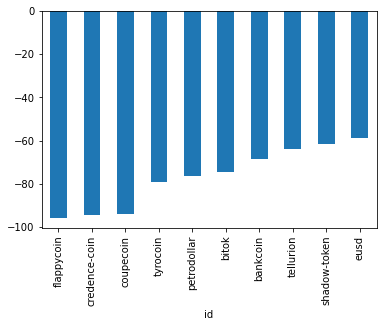

In [28]:
volatility.percent_change_24h[0:10].plot.bar()
plt.show()

(<Figure size 720x432 with 2 Axes>,
 <AxesSubplot:xlabel='id', ylabel='% change'>)

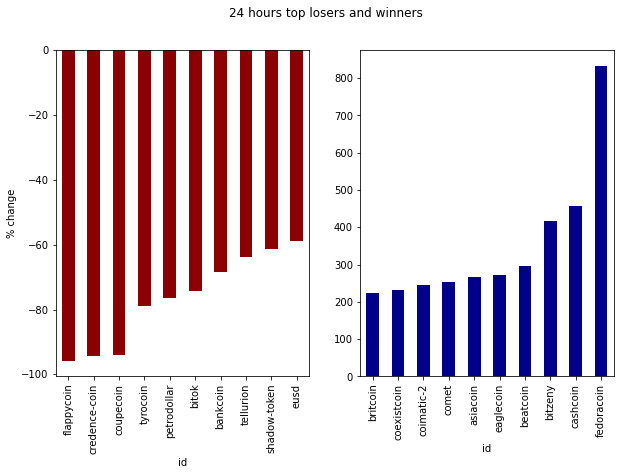

In [29]:
def top10_subplot(volatility_series, title):
    # making the subplot and the figure for nrows and ncolumns
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    # Plotting with pandas the barchart for the top 10 losers with the color RED
    ax = volatility_series[:10].plot.bar(color="darkred", ax=axes[0])
    fig.suptitle(title)
    ax.set_ylabel('% change')

    # Same as above, but for the top 10 winners and in darkblue
    volatility_series[-10:].plot.bar(color="darkblue", ax=axes[1])
    return fig, ax

DTITLE = "24 hours top losers and winners"

# Calling the function above with the volatility.percent_change_24h series
# and title DTITLE 
top10_subplot(volatility.percent_change_24h, DTITLE)


(<Figure size 720x432 with 2 Axes>,
 <AxesSubplot:xlabel='id', ylabel='% change'>)

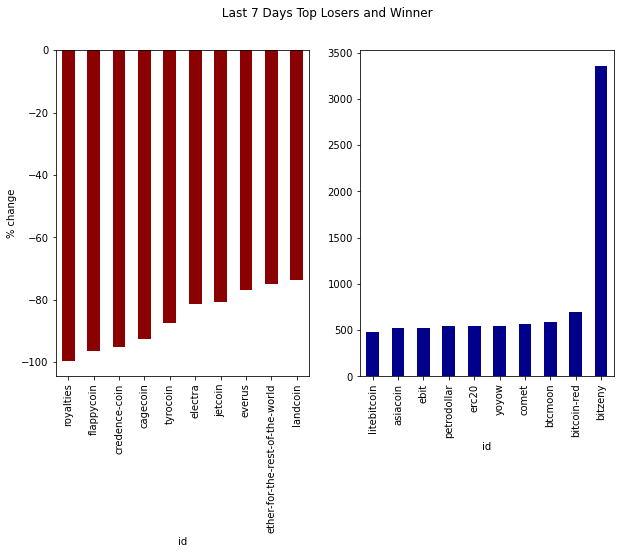

In [30]:
# Checking function with weekly data
volatility7d = volatility.sort_values('percent_change_7d')
top10_subplot(volatility7d.percent_change_7d, " Last 7 Days Top Losers and Winner")

In [31]:
volatility7d

,percent_change_24h,percent_change_7d
id,,
royalties,-9.06,-99.59
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
cagecoin,-36.26,-92.68
tyrocoin,-79.02,-87.43
...,...,...
yoyow,119.59,547.12
comet,252.07,560.46
btcmoon,-34.70,582.11


In [32]:
# Let's work only on largecaps (+10 billion USD market)
df[df['market_cap_usd']>10000000000]

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.50000,1,BTC,1.672352e+07
1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.65200,2,ETH,9.616537e+07
2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.09000,3,BCH,1.684044e+07
3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.30746,4,MIOTA,2.779530e+09


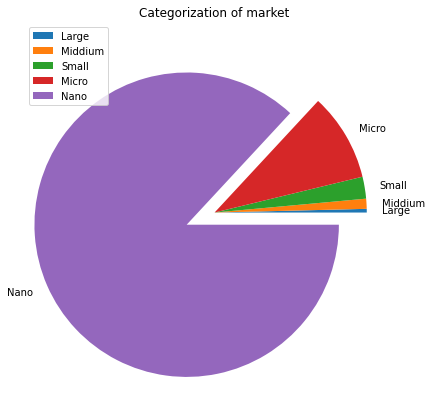

In [64]:
# Categorization of market
# Large cap: +10 billion
# Mid cap: 2 billion - 10 billion
# Small cap: 300 million - 2 billion
# Micro cap: 50 million - 300 million
# Nano cap: Below 50 million
large_cap =len(df[df['market_cap_usd']>10000000000])
mid_cap = len(df[(df['market_cap_usd']>2000000000) & (df['market_cap_usd']<=10000000000)])
small_cap = len(df[(df['market_cap_usd']>300000000) & (df['market_cap_usd']<=2000000000)])
micro_cap = len(df[(df['market_cap_usd']> 50000000) & (df['market_cap_usd']<=300000000)])
nano_cap = len(df[df['market_cap_usd']<=50000000])
market_category = [large_cap, mid_cap, small_cap, micro_cap, nano_cap]
LABELS = ["Large", "Middium", "Small", "Micro", "Nano"]
myexplode = [0, 0, 0, 0, 0.2]
fig = plt.figure(figsize =(10, 7))
plt.pie(market_category, labels=LABELS, explode= myexplode)
plt.title("Categorization of market")
plt.legend()
plt.show()